In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
df = pd.read_csv(r'Amazon Sale Report.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [31]:
df.drop(['New', 'PendingS', 'index'], axis=1, inplace=True)

In [34]:
df.rename(columns={'Qty':'Quantity'}, inplace=True)

In [36]:
df.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Quantity                  0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [37]:
#drop the row with null value
df.dropna(inplace=True)

In [38]:
df.isnull().sum()

Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Category              0
Size                  0
Courier Status        0
Quantity              0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
B2B                   0
fulfilled-by          0
dtype: int64

In [39]:
df.shape

(37514, 18)

In [41]:
#to change the data type for ship-postal-code from float to int
df['ship-postal-code'] = df['ship-postal-code'].astype('int')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37514 entries, 0 to 128892
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Order ID            37514 non-null  object 
 1   Date                37514 non-null  object 
 2   Status              37514 non-null  object 
 3   Fulfilment          37514 non-null  object 
 4   Sales Channel       37514 non-null  object 
 5   ship-service-level  37514 non-null  object 
 6   Category            37514 non-null  object 
 7   Size                37514 non-null  object 
 8   Courier Status      37514 non-null  object 
 9   Quantity            37514 non-null  int64  
 10  currency            37514 non-null  object 
 11  Amount              37514 non-null  float64
 12  ship-city           37514 non-null  object 
 13  ship-state          37514 non-null  object 
 14  ship-postal-code    37514 non-null  int64  
 15  ship-country        37514 non-null  object 
 16  B2B     

In [43]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [46]:
df[['Amount', 'Quantity']].describe()

,Amount,Quantity
count,37514.000000,37514.000000
mean,646.553960,0.867383
std,279.952414,0.354160
min,0.000000,0.000000
25%,458.000000,1.000000
50%,629.000000,1.000000
75%,771.000000,1.000000
max,5495.000000,5.000000


[Text(0, 0, '4558'),
 Text(0, 0, '4535'),
 Text(0, 0, '6646'),
 Text(0, 0, '2587'),
 Text(0, 0, '189'),
 Text(0, 0, '5090'),
 Text(0, 0, '6806'),
 Text(0, 0, '6326'),
 Text(0, 0, '554'),
 Text(0, 0, '119'),
 Text(0, 0, '104')]

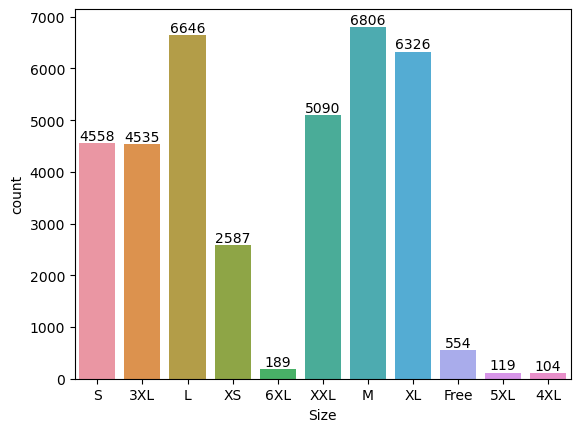

In [56]:
#which kind of size was ordered
ax = sns.countplot(x = 'Size', data = df)
ax.bar_label(ax.containers[0])

# for bars in ax.containers:
    #ax.bar_label(bars)

<Axes: xlabel='Category', ylabel='count'>

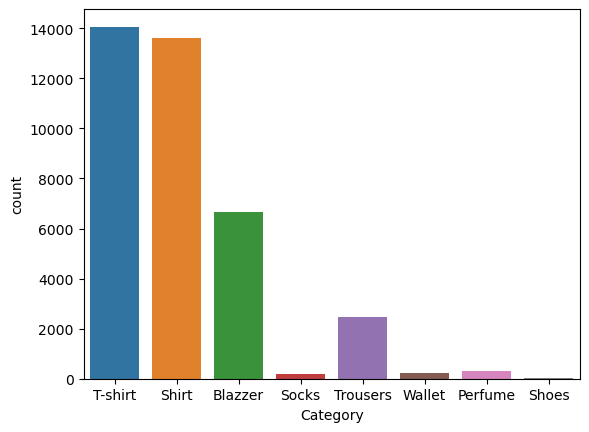

In [50]:
#which kind of stuffs were ordered
sns.countplot(x = 'Category', data = df)

In [67]:
#sort the data by size
sh = df.groupby(['Size'], as_index=False) ['Quantity'].sum().sort_values(by='Quantity', ascending = False)
sh

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


[Text(0, 0, '4558'),
 Text(0, 0, '4535'),
 Text(0, 0, '6646'),
 Text(0, 0, '2587'),
 Text(0, 0, '189'),
 Text(0, 0, '5090'),
 Text(0, 0, '6806'),
 Text(0, 0, '6326'),
 Text(0, 0, '554'),
 Text(0, 0, '119'),
 Text(0, 0, '104')]

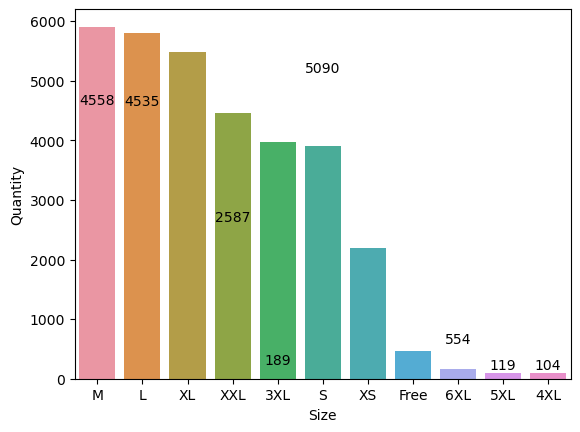

In [70]:
ax1 = sns.barplot(x = 'Size', y = 'Quantity', data = sh)
ax1.bar_label(ax.containers[0])

<Axes: xlabel='Courier Status', ylabel='count'>

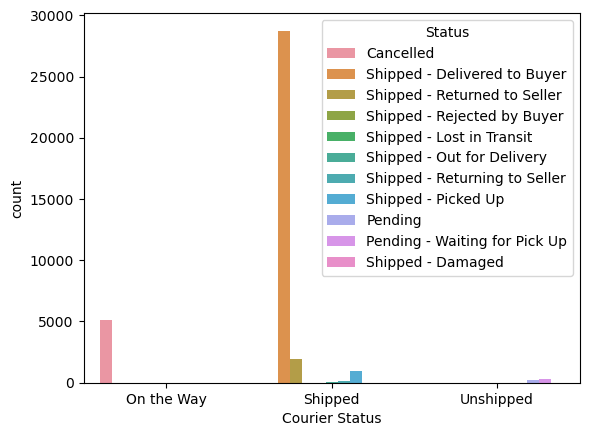

In [77]:
#Courier Status...in count plot

df.groupby(['Courier Status'], as_index = False) ['Status'].sum().sort_values(by='Status', ascending = False)
sns.countplot(x = 'Courier Status', data = df, hue = 'Status')


<Axes: >

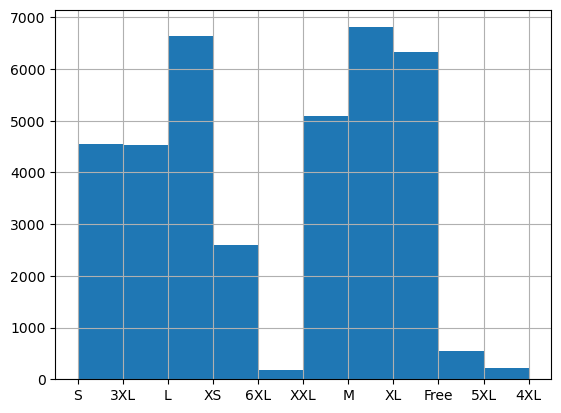

In [78]:
# histogram for size
df['Size'].hist()

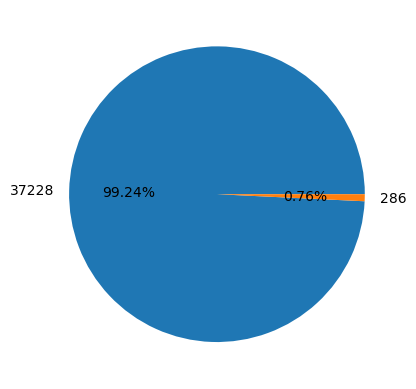

In [82]:
#Pie chart
B2B = df['B2B'].value_counts()
plt.pie(B2B, autopct='%1.2f%%', labels=B2B)
plt.show()

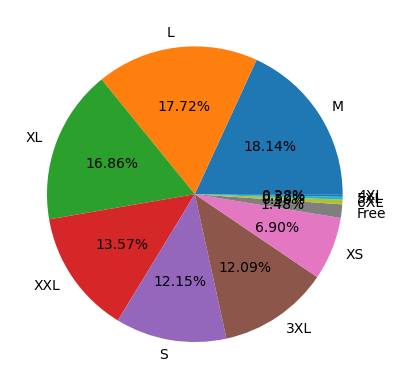

In [88]:
#pie plt
size = df['Size'].value_counts()
l = ['M', 'L', 'XL', 'XXL', 'S', '3XL', 'XS', 'Free', '6XL', '5XL', '4XL']
plt.pie(size, labels=l, autopct='%1.2f%%')
plt.show()

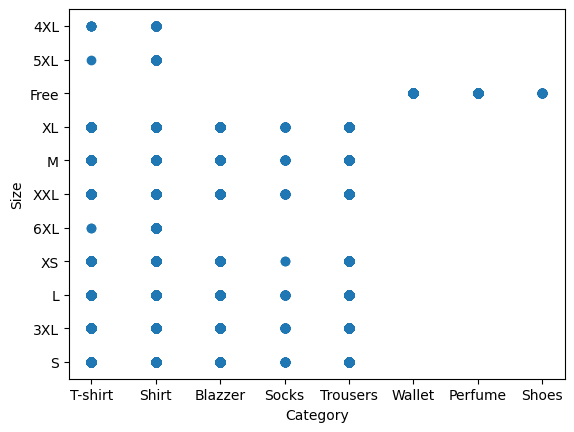

In [89]:
#scatter plt
y = df['Size']
x = df['Category']
plt.scatter(x,y)
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

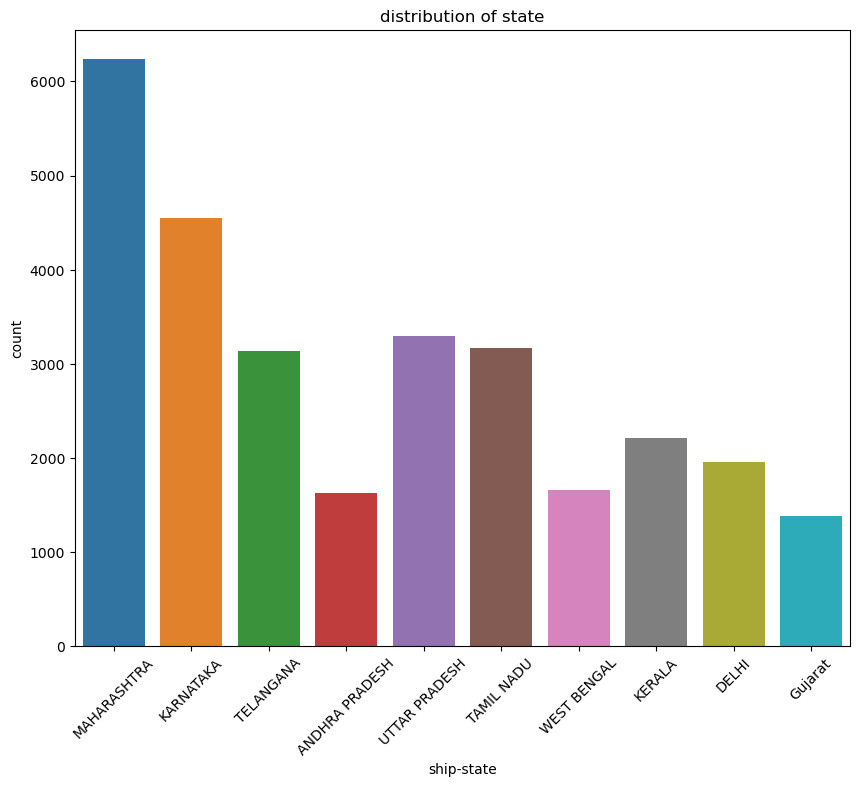

In [106]:
#state count with order
top_10_state=df['ship-state'].value_counts().head(10)

plt.figure(figsize=(10,8))
sns.countplot(data=df[df['ship-state'].isin(top_10_state.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('distribution of state')
plt.xticks(rotation=45)
plt.show()